# Check Geomedian from collection 3

In [1]:
%matplotlib inline
import datacube
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import glob, os
import xarray as xr
import numpy as np

In [3]:
import pandas as pd
import geopandas as gpd

In [4]:
from shapely import geometry

In [5]:
def tile_id_to_shape(tile_id):
    tile_x = float(tile_id.split('_')[1])
    tile_y = float(tile_id.split('_')[3])
    minx, maxx = tile_x*60000,tile_x*60000+120000
    maxy, miny = tile_y*60000,tile_y*60000-120000
    return geometry.box(minx, miny, maxx, maxy)

## Water classification from geomedian

In [6]:
# compare wofs output

outcsv = 'wofs_diff_stats.csv'
diff = pd.read_csv(outcsv)
#diff=diff[diff['overlap']>=1.]

shapes = diff.tile_id.apply(tile_id_to_shape)
diff_shapes = gpd.GeoDataFrame(diff)
diff_shapes['geometry'] = shapes

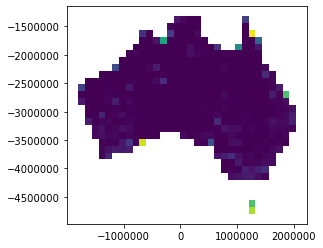

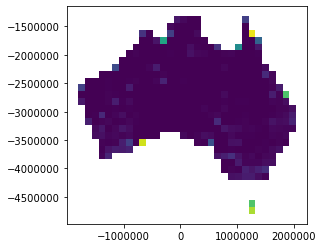

In [7]:
# extract land
thresh=0.1
diff_shapes[diff_shapes['waterfrac_c3']<thresh].plot(column='waterfrac_c3', vmin=0, vmax=thresh)
diff_shapes[diff_shapes['waterfrac_c2']<thresh].plot(column='waterfrac_c2', vmin=0, vmax=thresh)

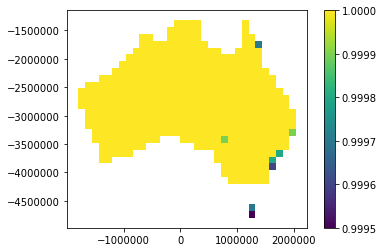

In [8]:
# overlap of valid pixels
land = diff_shapes[diff_shapes['waterfrac_c3']<0.1]

land.plot(column='overlap',legend=True, vmin=0.9995, vmax=1)

In [9]:
# change in water fraction
water_fracs = land[['water_c3', 'water_c2']].sum()/(land['overlap']*4000*4000.).sum()
print("water fractions",water_fracs)
print("change", (water_fracs['water_c2'] - water_fracs['water_c3']))
print("percentage change", (water_fracs['water_c2'] - water_fracs['water_c3'])*100/water_fracs['water_c2'])

water fractions water_c3    0.002514
water_c2    0.002592
dtype: float64
change 7.815324931001238e-05
percentage change 3.015575025946299


In [10]:
# change in area
total_area = land[['water_c3', 'water_c2']].sum()*30*30/1e6
print("water area km^2", total_area)
print("water area change km^2", total_area['water_c3']-total_area['water_c2'])
print("percentage change", (total_area['water_c3']-total_area['water_c2'])*100./total_area['water_c2'])

water area km^2 water_c3    17336.9007
water_c2    17875.9638
dtype: float64
water area change km^2 -539.063100000003
percentage change -3.01557502594631


/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


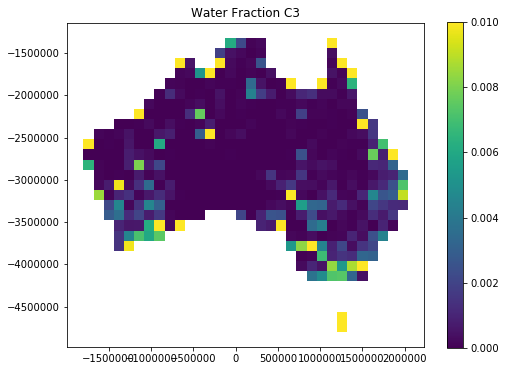

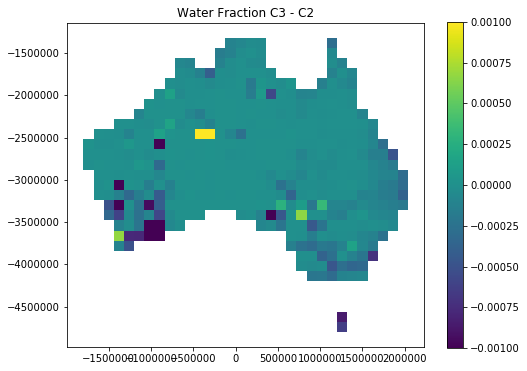

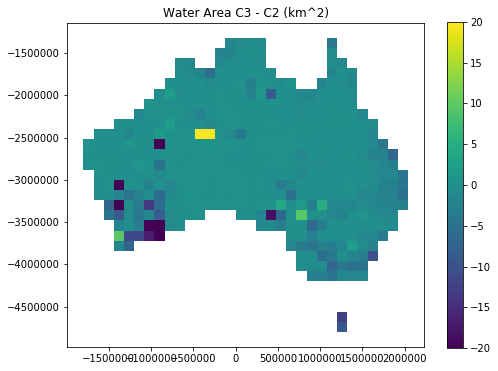

In [11]:
land.plot(column='waterfrac_c3', vmax=0.01,legend=True, figsize=(8,6));
plt.title('Water Fraction C3');

land['difffrac']=(land['waterfrac_c3']-land['waterfrac_c2'])
land.plot(column='difffrac', vmin=-0.001, vmax=0.001, legend=True, figsize=(8,6));
plt.title('Water Fraction C3 - C2');

land['diff']=(land['water_c3']-land['water_c2'])*30*30/1e6
land.plot(column='diff', vmin=-20, vmax=20, legend=True, figsize=(8,6));
plt.title('Water Area C3 - C2 (km^2)');

# Surface reflectance 

In [12]:
# compare surface reflectance 

outcsv = 'diff_stats.csv'
srdiff = pd.read_csv(outcsv)
srdiff=srdiff[srdiff['overlap']>=.99]

shapes = srdiff.tile_id.apply(tile_id_to_shape)
srdiff_shapes = gpd.GeoDataFrame(srdiff)
srdiff_shapes['geometry'] = shapes

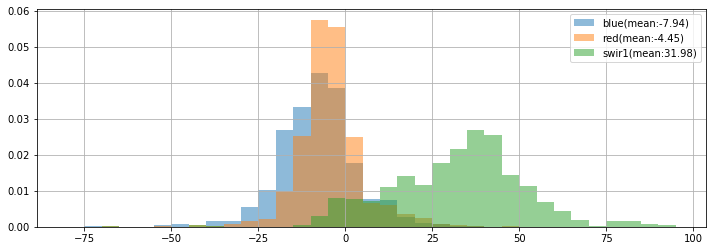

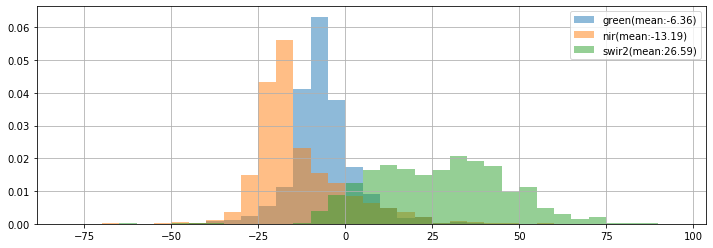

In [13]:
plt.figure(figsize=(12,4))
out={}
for band in ['blue',  'red',  'swir1', ]:
    srdiff['%s_mean'%band].hist(alpha=0.5, label=band+'(mean:%.2f)'%srdiff['%s_mean'%band].mean(), bins=np.arange(-80,100,5), density=True);

plt.legend();

plt.figure(figsize=(12,4))
out={}
for band in ['green', 'nir', 'swir2']:
    srdiff['%s_mean'%band].hist(alpha=0.5, label=band+'(mean:%.2f)'%srdiff['%s_mean'%band].mean(), bins=np.arange(-80,100,5), density=True);

plt.legend();

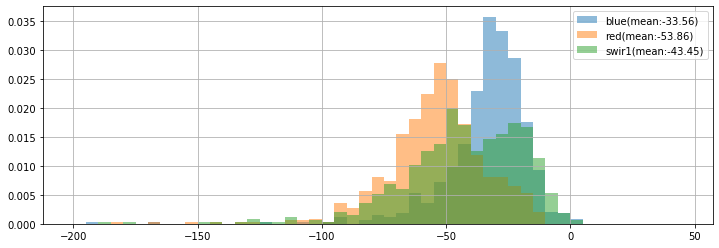

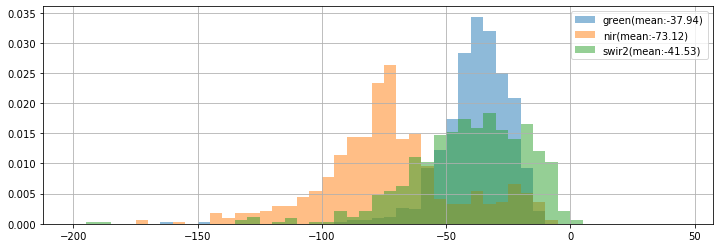

In [14]:
plt.figure(figsize=(12,4))
out={}
for band in ['blue',  'red',  'swir1', ]:
    srdiff['%s_p10'%band].hist(alpha=0.5, label=band+'(mean:%.2f)'%srdiff['%s_p10'%band].mean(), bins=np.arange(-200,50,5), density=True);

plt.legend();

plt.figure(figsize=(12,4))
out={}
for band in ['green', 'nir', 'swir2']:
    srdiff['%s_p10'%band].hist(alpha=0.5, label=band+'(mean:%.2f)'%srdiff['%s_p10'%band].mean(), bins=np.arange(-200,50,5), density=True);

plt.legend();

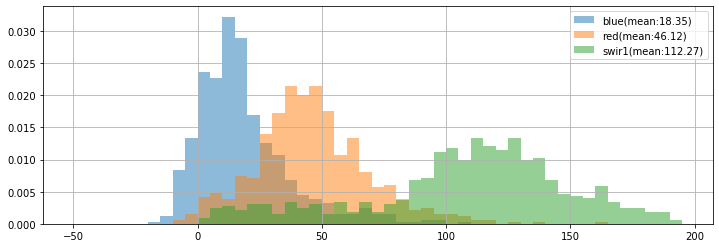

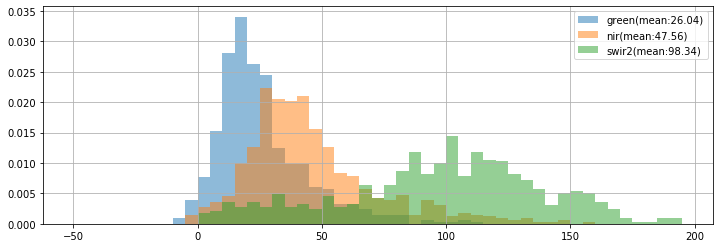

In [15]:
plt.figure(figsize=(12,4))
out={}
for band in ['blue',  'red',  'swir1', ]:
    srdiff['%s_p90'%band].hist(alpha=0.5, label=band+'(mean:%.2f)'%srdiff['%s_p90'%band].mean(), bins=np.arange(-50,200,5), density=True);

plt.legend();

plt.figure(figsize=(12,4))
out={}
for band in ['green', 'nir', 'swir2']:
    srdiff['%s_p90'%band].hist(alpha=0.5, label=band+'(mean:%.2f)'%srdiff['%s_p90'%band].mean(), bins=np.arange(-50,200,5), density=True);

plt.legend();

/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


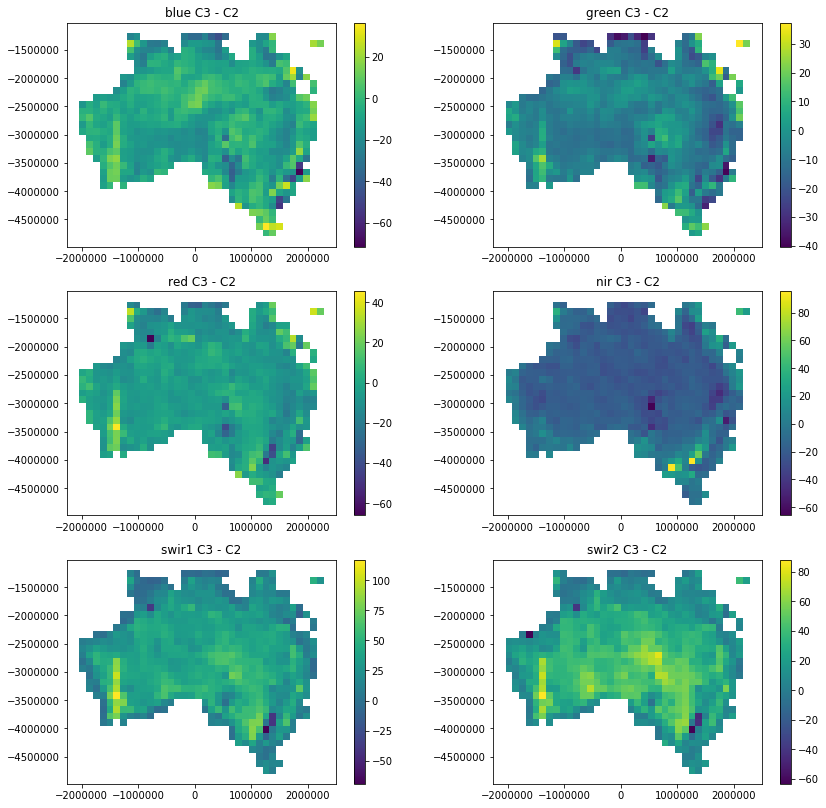

In [16]:
f, axes = plt.subplots(3, 2, figsize=(14,14))
axes = axes.ravel()
for iband, band in enumerate(['blue', 'green', 'red', 'nir', 'swir1', 'swir2']):
    srdiff_shapes.plot(column='%s_mean'%band, ax = axes[iband],legend=True)
    axes[iband].set_title(band + ' C3 - C2')

/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


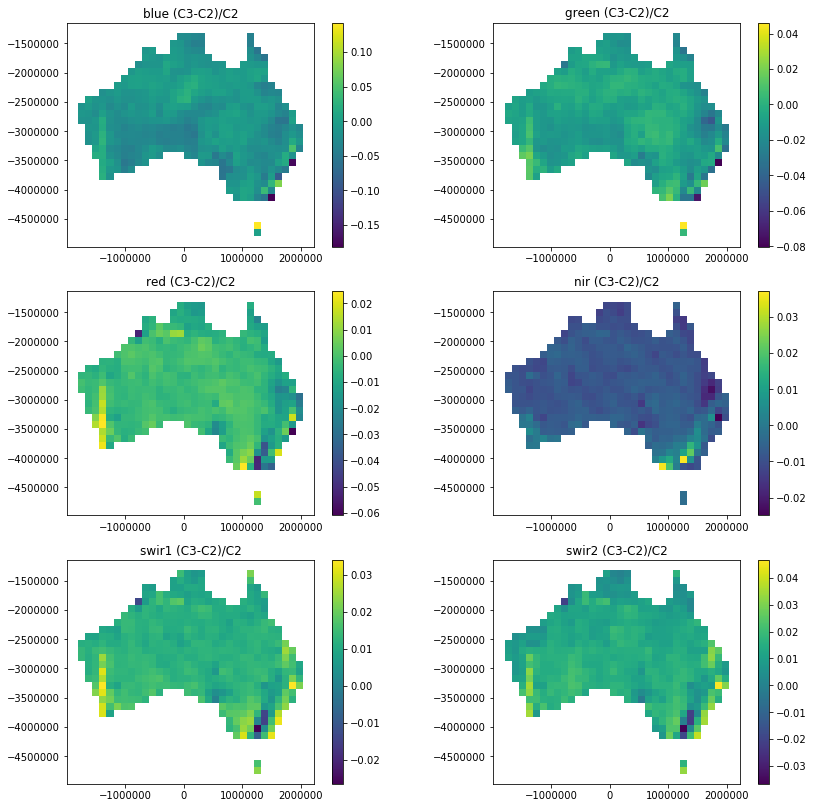

In [17]:
srdiff_land = srdiff_shapes[srdiff_shapes['tile_id'].isin(land['tile_id'].values)]
f, axes = plt.subplots(3, 2, figsize=(14,14))
axes = axes.ravel()
for iband, band in enumerate(['blue', 'green', 'red', 'nir', 'swir1', 'swir2']):
    srdiff_land['plot'] = srdiff_land['%s_mean'%band]/srdiff_land['%s_c2med'%band]
    srdiff_land.plot(column='plot', ax = axes[iband], legend=True)
    axes[iband].set_title(band + ' (C3-C2)/C2')

## Load tile and compare

In [18]:
tile_id = 'x_22_y_-62'

tile_x = '_'.join(tile_id.split('_')[:2])
tile_y = '_'.join(tile_id.split('_')[2:])

In [19]:
minx, maxx = float(tile_x.split('_')[1])*60000,float(tile_x.split('_')[1])*60000+120000
maxy, miny = float(tile_y.split('_')[1])*60000,float(tile_y.split('_')[1])*60000-120000

## compare to collection 2

In [20]:
prod_dc = datacube.Datacube()

In [21]:
#dss = prod_dc.find_datasets(product='ls8_nbart_geomedian_annual', time=('2015-01-01','2015-01-01'))

In [22]:
bands = ['swir1','nir','green']
c3_path = glob.glob('/g/data/u46/users/ea6141/stats-tests/gm_c3/LS_GM/%s/%s'%(tile_x,tile_y))[0]

c3s =[]
c2s =[]
for iband, band in enumerate(bands):
    try:
        c3_file = glob.glob('%s/2015/*_%s.tif'%(c3_path,band))[0]
    except:
        c3_file = glob.glob('%s/2015/*_%s_%s.tif'%(c3_path,band[:-1], band[-1]))[0]
    c3 = xr.open_rasterio(c3_file).to_dataset(dim='band').rename({1:band})
    c2 = prod_dc.load(product='ls8_nbart_geomedian_annual', time=('2015-01-01','2015-02-01'),
                        x=(c3.x.min().values-30,c3.x.max().values+30),
                        y=(c3.y.min().values-30,c3.y.max().values+30),
                        crs="EPSG:3577",
                        measurements=[band],
                ).interp_like(c3, method='linear')
    c3s.append(c3)
    c2s.append(c2)

In [23]:
c3_multi=xr.merge(c3s)
c2_multi=xr.merge(c2s)

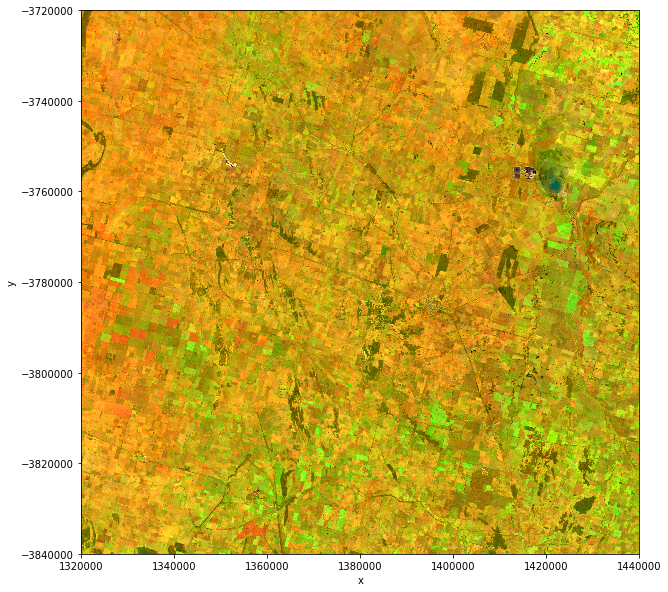

In [24]:
c3_multi[bands].to_array().plot.imshow(figsize=(10,10),robust=True)

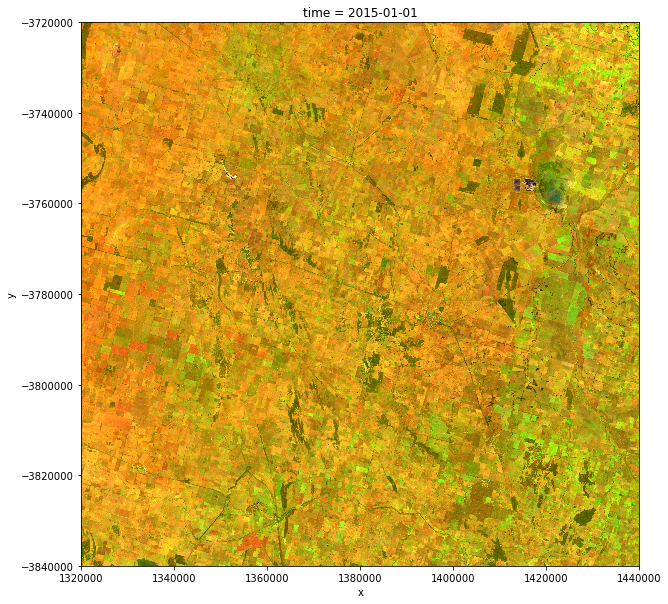

In [25]:
c2_multi[bands].squeeze().to_array().plot.imshow(figsize=(10,10),robust=True)